In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from pmdarima import auto_arima

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
df=pd.read_csv('co2_mm_mlo.csv')

In [23]:
df

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [24]:
df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [25]:
df

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01
...,...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71,2018-07-01
725,2018,8,2018.625,406.99,406.99,2018-08-01
726,2018,9,2018.708,405.51,405.51,2018-09-01
727,2018,10,2018.792,406.00,406.00,2018-10-01


In [27]:
df.set_index('date')

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


In [29]:
df=df.set_index('date')

In [30]:
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


In [31]:
df.index.freq='MS'

<AxesSubplot:xlabel='date'>

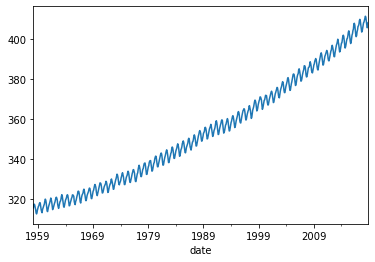

In [32]:
df['interpolated'].plot()

In [35]:
results=seasonal_decompose(df['interpolated']);

<AxesSubplot:xlabel='date'>

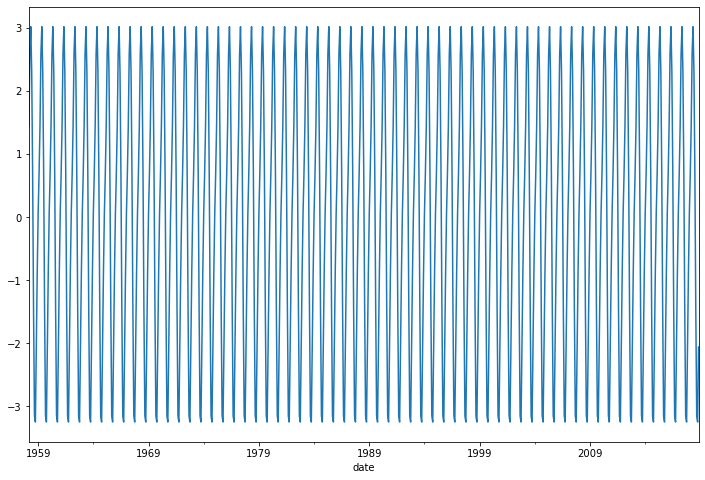

In [38]:
results.seasonal.plot(figsize=(12,8))

In [48]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -205.178
Date:                              Sun, 27 Jun 2021   AIC                            424.356
Time:                                      21:55:49   BIC                            456.489
Sample:                                           0   HQIC                           436.755
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3516      0.036     -9.738      0.000      -0.422      -0.281
ar.L2         -0.1469      0.035     -4.146      0.000      -0.216      -0.077
ar.L3         -0.1323      0.038     -3.471      0.001      -0.207      -0.058
ar.L4         -0.1051      0.037     -2.833      0.005      -0.178      -0.032
ar.S.L12       0.9996      0.000   3161.311      0.000       0.999       1.000
ma.S.L12      -0.8656      0.022    -40.025      0.000      -0.908      -0.823
sigma2         0.0955      0.005     20.223      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.74   Prob(JB):                         0.16
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
import warnings

In [47]:
warnings.filterwarnings('ignore')

In [49]:
train=df.iloc[:717]
test=df.iloc[717:]

In [50]:
model=SARIMAX(train['interpolated'],order=(4,1,0),seasonal_order=(1, 0, [1], 12))

In [51]:
results=model.fit()

In [54]:
pred=results.predict(start=717,end=728,typ='levels')

<AxesSubplot:xlabel='date'>

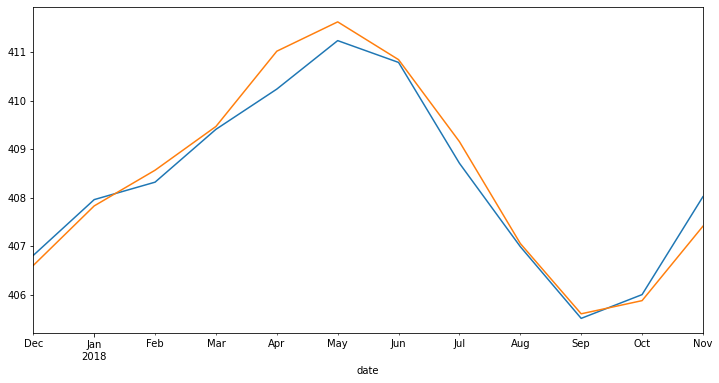

In [55]:
test['interpolated'].plot(figsize=(12,6))
pred.plot(figsize=(12,6))

In [57]:
from statsmodels.tools.eval_measures import rmse

In [58]:
rmse(pred,test['interpolated'])

0.3519344941590916

In [59]:
model=SARIMAX(df['interpolated'],order=(4,1,0),seasonal_order=(1, 0, [1], 12))

In [60]:
results=model.fit()

In [61]:
predi=results.predict(start=728,end=739,typ='levels')

<AxesSubplot:xlabel='date'>

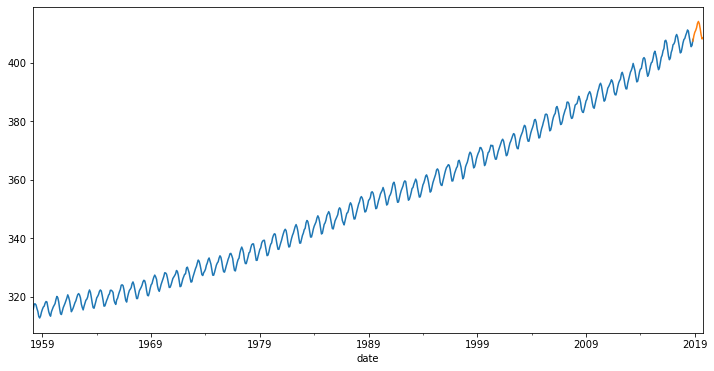

In [62]:
df['interpolated'].plot(figsize=(12,6))
predi.plot(figsize=(12,6))